<a href="https://colab.research.google.com/github/julwalzajjj/BMSTUtasks/blob/main/RS_L4_2_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ó–∞–¥–∞—á–∞ –ê: –ø–µ—Ä—Å–æ–Ω–∞–ª—å–Ω—ã–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏

## –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –∑–∞–¥–∞—á–∏

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∑–∞–∫–∞–∑–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –¥–ª—è –µ–≥–æ –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö –ø–æ–∫—É–ø–æ–∫. –†–µ–ª–µ–≤–∞–Ω—Ç–Ω–æ—Å—Ç—å —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –±—É–¥–µ—Ç –æ—Ü–µ–Ω–∏–≤–∞—Ç—å—Å—è –∏—Å—Ö–æ–¥—è –∏–∑ –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö –ø–æ–∫—É–ø–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ —Ç–æ–≥–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ –∞–ª–≥–æ—Ä–∏—Ç–º –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å.

In [2]:
!pip install scann

In [ ]:
!pip install rank_bm25

In [3]:
!pip install feature_engine

In [ ]:
!pip install faiss-gpu

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.5/85.5 MB 6.9 MB/s eta 0:00:00


In [4]:
!pip install tqdm

In [ ]:
!pip install xlearn

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.9/4.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xlearn: filename=xlearn-0.40a1-py3-none-any.whl size=225749 sha256=e31f6152f9b39941df625e3b29ac58f76728f4d363a4180f580d44623c61f91a
  Stored in directory: /root/.cache/pip/wheels/09/48/04/779ee06b22532c86cde8da8984b83284517492dad1df998c6a
Successfully built xlearn


In [ ]:
!pip install catboost

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.6/98.6 MB 8.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
# import faiss
import random
import scann

from tqdm import notebook, tqdm

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

from feature_engine.creation import CyclicalFeatures

from gensim.models import Word2Vec

# import xlearn as xl
# # from xlearn import DMatrix

# import catboost as cb

from sklearn.datasets import dump_svmlight_file

# from rank_bm25 import BM25Okapi
# from itertools import chain

In [6]:
import seaborn as sns

In [7]:
from scipy.stats import norm

In [8]:
RANDOM_STATE=34

## L3 –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏, –ø—Ä–æ–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–∞–ª–∏–¥–∞—Ü–∏–∏

–ò—Ç–æ–≥: —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∞ –æ–±—É—á–∞—é—â–∞—è, —Ç–µ—Å—Ç–æ–≤–∞—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∏, –ø–æ—Å—Ç—Ä–æ–µ–Ω –ø–∞–π–ø–ª–∞–π–Ω –≤–∞–ª–∏–¥–∞—Ü–∏–∏

–ü–ª–∞–Ω:

- [x] Cleaning: –∫—Ä–∏—Ç–µ—Ä–∏–π –ì—Ä–∞–±–±—Å–∞
- [x] Feature Engeneering
    1. [x] –û–±—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
    2. [x] –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
- [x] –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ
- [x] –†–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ
    1. [x] –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞
    2. [x] –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è
    3. [x] –†–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ
- [ ] –û—Ü–µ–Ω–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
- [ ] Feature importance (?)
- [ ] –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è

In [9]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/wb_school_task_1.csv.gzip", compression='gzip')
except:
    data = pd.read_csv(r"C:\Users\User\Documents\wildberries\wb_school_task_1.csv.gzip", compression='gzip')

Mounted at /content/drive


### –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –≤—ã–±–æ—Ä–æ–∫

–î–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É (–±—É–¥–µ–º –ø—Ä–æ–≤–æ–¥–∏—Ç—å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é):

–ù—É–∂–Ω–æ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–∫—É–ø–æ–∫, —á—Ç–æ–±—ã –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –±—ã–ª–∏ –Ω–∞–∏–±–æ–ª–µ–µ –Ω–æ–≤—ã–µ. –í —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω—ã—Ö —Å–∏—Å—Ç–µ–º–∞—Ö —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º. –¢–∞–∫–∂–µ –¥–ª—è —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ.

In [10]:
sorted_data = data.sort_values(by=['order_ts']).reset_index(drop=True)

In [11]:
sorted_data['order_ts'] = pd.to_datetime(sorted_data['order_ts'])

In [12]:
train = sorted_data[sorted_data['order_ts'].dt.month != 3]

In [13]:

test = sorted_data[sorted_data['order_ts'].dt.month == 3]

–ò–∑ —Ç–µ—Å—Ç–æ–≤–æ–π (–≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π) –≤—ã–±–æ—Ä–∫–∏ –±—É–¥–µ–º –±—Ä–∞—Ç—å **—Å–ø–∏—Å–æ–∫ –ø–æ–∫—É–ø–æ–∫** –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è.

![image.png](attachment:image.png)

### –û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤

–û–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –ø–æ –∫—Ä–∏—Ç–µ—Ä–∏—é –ì—Ä–∞–±–±—Å–∞ —Å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –≤—ã–±—Ä–æ—Å–æ–≤, –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –∑–Ω–∞—á–µ–Ω–∏—è —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã, –∏—Ö –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –ø–æ–º–µ–Ω—è—Ç—å. –î–ª—è –Ω–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –æ—Ç—á–∏—â–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤ –º–µ—Ç–æ–¥–∞–º–∏ `KNN` –∏ `IsolationForest` —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–∏–µ (–æ–∫–æ–ª–æ 3-–µ—Ö –º–∏–Ω—É—Ç –¥–ª—è 1/5 —á–∞—Å—Ç–∏).

–ü—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è —Ñ—É–Ω–∫—Ü–∏—è `CleaningOutliners`, –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è, —Å–¥–µ–ª–∞–Ω–Ω—ã–µ –ø–æ –≤—ã–≤–æ–¥–∞–º –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—ã–±—Ä–æ—Å–æ–≤ –Ω–∞ —ç—Ç–∞–ø–µ L1:

In [14]:
def outlinersGrubbs(data, column, percent):
    df = data.copy()
    df['g_score'] = np.abs(df[column] - df[column].mean()) / df[column].std()
    df['p_value'] = 2 * norm.sf(abs(df['g_score']))
    return df.sort_values(by='p_value', ascending=True).head(round(df.shape[0]*percent/100))

def multiInd(x):
    indexes = list(x.index)
    first_col = []
    second_col = []
    for row in indexes:
        first_col.append(row[1])
        second_col.append(row[0])
    return first_col, second_col

# CleaningOutliners
# input: data - –¥–∞—Ç–∞—Å–µ—Ç,
#        p1 - –ø—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –±–æ–ª—å—à–∏—Ö –∑–∞–∫–∞–∑–æ–≤,
#        p2 - –ø—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∑–∞–∫–∞–∑–æ–≤ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è,
#        p3 - –ø—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –∑–∞–∫–∞–∑–æ–≤ —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ —Ç–æ–≤–∞—Ä–∞–º–∏,
#        p4 - –ø—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –∞–∫—Ç–∏–≤–Ω—ã—Ö —é–∑–µ—Ä–æ–≤,
#        p5 - –ø—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –¥–ª—è –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤,
# otput: df - –æ—Ç—á–∏—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç

def CleaningOutliners(data, p1=0.002, p2=0.01, p3=0.001, p4=0.02, p5=0.05):

    df = data.copy()

    orders = df.groupby(['order_ts', 'user_id']).count()
    orders_out = outlinersGrubbs(orders, 'item_id', p1)
    users_bg_orders, dates_bg_orders = multiInd(orders_out)
    df = df[~(df['user_id'].isin(users_bg_orders) & df['order_ts'].isin(dates_bg_orders))]

    cnt_orders = df.drop(['item_id'], axis=1).drop_duplicates().groupby(['user_id']).count()
    cnt_orders_out = outlinersGrubbs(cnt_orders, 'order_ts', p2)
    df = df[~(df['user_id'].isin(cnt_orders_out.index))]

    duplicated_items = df[df.duplicated()].value_counts().sort_values(ascending=False)
    duplicated_items = pd.DataFrame(duplicated_items, columns=['items_cnt'])
    duplicated_items_out = outlinersGrubbs(duplicated_items, 'items_cnt', p3)
    items_dup, users_dup = multiInd(duplicated_items_out)
    df = df[~(df['user_id'].isin(users_dup) & df['item_id'].isin(items_dup))]

    data_wo_date = df.drop(['order_ts'], axis = 1)
    users_cnt_items = data_wo_date.groupby(['user_id']).count()
    users_cnt_items_out = outlinersGrubbs(users_cnt_items, 'item_id', p4)
    df = df[~(df['user_id'].isin(users_cnt_items_out.index))]

    data_wo_date = df.drop(['order_ts'], axis = 1)
    items_cnt_users = data_wo_date.groupby(['item_id']).count()
    items_cnt_users_out = outlinersGrubbs(items_cnt_users, 'user_id', p5)
    df = df[~(df['item_id'].isin(items_cnt_users_out.index) | df['item_id'].isin(
        items_cnt_users[items_cnt_users['user_id'] == 1].index))]

    return df


In [15]:
train_ = train.copy()

In [16]:
train_.shape

(13339315, 3)

In [17]:
train_ = CleaningOutliners(train_)

In [18]:
train_.shape

(12466369, 3)

### –†–∞–±–æ—Ç–∞ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

#### –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ù–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∑–∞ —Å—á–µ—Ç –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –ø–æ –¥–∞—Ç–∞–º. –î–ª—è —ç—Ç–æ–≥–æ –ø—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ –∫–æ–¥–∏—Ä–≤–æ–≤–∞–Ω–∏—è –¥–∞—Ç—ã —Å–∏–Ω—É—Å–æ–∏–¥–∞–ª—å–Ω–æ–π –∏ –∫–æ—Å–∏–Ω—É—Å–æ–∏–¥–∞–ª—å–Ω–æ–π —Å–æ—Å—Ç–∞–≤–ª—è—é—â–∏—Ö –¥–ª—è —É—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ–∫—É–ø–∫–∏.

–ê —Ç–∞–∫–∂–µ –¥–æ–±–∞–≤–∏–º –ø—Ä–∏–∑–Ω–∞–∫ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ –∞–π—Ç–µ–º–∞.

In [19]:
def FeaturesAdd(data):

    df = data.copy()
    df_grouped = df.groupby(by=['item_id']).count()
    df_grouped.drop(['order_ts'], axis=1, inplace=True)
    df_grouped.columns = ['count']
    scaler = StandardScaler()
    df_grouped['count'] = scaler.fit_transform(df_grouped)

    df_time = pd.DataFrame(pd.to_datetime(df['order_ts']))
    df_time['day'] = df_time['order_ts'].dt.day
    df_time['month'] = df_time['order_ts'].dt.month
    df_time['hour'] = df_time['order_ts'].dt.hour
    df.drop(['order_ts'], axis=1, inplace=True)
    df_time.drop(['order_ts'], axis=1, inplace=True)

    cyclical = CyclicalFeatures(variables=None, drop_original=True)
    df_time = cyclical.fit_transform(df_time)

    df = df.join(df_grouped, on='item_id', how='left')

    return pd.concat([df, df_time], axis=1)

In [20]:
train_f = FeaturesAdd(train_)
train_f.head()

user_id  item_id     count   day_sin  day_cos     month_sin  month_cos  \
0   698494     6868 -0.221754  0.201299  0.97953  1.224647e-16       -1.0   
1   851330     5116 -0.195990  0.201299  0.97953  1.224647e-16       -1.0   
2   737479      787  1.153015  0.201299  0.97953  1.224647e-16       -1.0   
3   760693      252  0.278785  0.201299  0.97953  1.224647e-16       -1.0   
4  1023317     5273 -0.050575  0.201299  0.97953  1.224647e-16       -1.0   

   hour_sin  hour_cos  
0       0.0       1.0  
1       0.0       1.0  
2       0.0       1.0  
3       0.0       1.0  
4       0.0       1.0

–ü–æ–ª—É—á–∏–≤—à–∏–µ—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏:
- `count` - –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å —Ç–æ–≤–∞—Ä–∞
- `day_sin`, `day_cos` - –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–Ω—è
- `month_sin`, `month_cos` - –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–µ—Å—è—Ü–∞
- `hour_sin`, `hour_cos` - –ø—Ä–∏–∑–Ω–∞–∫–∏ —á–∞—Å–∞

–ò—Å—Ç–æ—á–Ω–∏–∫–∏:
1. <a href='https://www.kaggle.com/code/jonaspalucibarbosa/removing-outliers-within-a-pipeline/notebook'> –ü—Ä–∏–º–µ—Ä –ø–∞–π–ø–ª–∞–π–Ω–∞ –¥–ª—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—ã–±—Ä–æ—Å–æ–≤ </a>
2. <a href='https://translated.turbopages.org/proxy_u/en-ru.ru.b90e6737-64773576-92b1ac5f-74722d776562/https/stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning'> –•–æ—Ä–æ—à–µ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞—Ç—ã </a>
3. <a href='https://machinelearningmastery.ru/locality-sensitive-hashing-for-music-search-f2f1940ace23/'> –ü—Ä–æ LSH </a>


### –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤

–ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤ –±—É–¥–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—å –º–µ—Ç–æ–¥–æ–º –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `faiss`, –æ–Ω–æ –±—É–¥–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç—å –≤ —Ñ—É–Ω–∫—Ü–∏–∏ `Recovery()`.

–ö–∞–Ω–¥–∏–¥–∞—Ç–æ–≤ –∏–∑–≤–ª–µ–∫–∞–µ–º –∏–∑ –∫–∞–∂–¥–æ–≥–æ –±–∞—Ç—á–∞ —Ä–∞–∑–º–µ—Ä–∞ `n` - –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –±–∞—Ç—á–∞ –∑–∞–≤–∏—Å–∏—Ç —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω–æ—Å—Ç—å —Ç–æ–≤–∞—Ä–æ–≤, –º–æ–∂–Ω–æ —Ç–∞–∫–∂–µ —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å –≤—Ä–µ–º—è –Ω–∞—á–∞–ª–∞ –æ—Ç–±–æ—Ä–∞ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤, –Ω–∞—á–∏–Ω–∞—è –Ω–µ —Å –Ω–∞—á–∞–ª–∞ –≤—ã–±–æ—Ä–∫–∏.

–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –µ—Å—Ç—å –∏ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–≤–æ—á–Ω–æ–π, –∏ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö:

In [21]:
users_test = list(test['user_id'].unique())
users_train = list(train_['user_id'].unique())
users_tt = list(set(users_train) & set(users_test))
len(set(users_train) & set(users_test))

715796

In [22]:
def map_at_k(precisions_at_k):
    return precisions_at_k.mean()

def precision_at_k(recommendations, purchases):
    recommended_list = np.array(recommendations)
    flags = np.isin(purchases, recommended_list)

    return flags.sum()/len(recommendations)

def recall_at_k(recommendations, purchases):
    recommended_list = np.array(recommendations)
    flags = np.isin(purchases, recommended_list)

    return flags.sum()/len(purchases)

In [ ]:
def Recovery(train, test, user_id, top, n, k, num_emb):
    itter = round(train.shape[0]/n) # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç—Ç–µ—Ä–∞—Ü–∏–π
    distances = []
    indexes = []

    user_data = train[train['user_id'] == user_id].reset_index(drop=True)
    user_vectors = np.array(user_data).astype('float32')
    user_vectors_—Å = user_vectors.copy(order='C')

    for i in range(0, itter+1):
        index = faiss.IndexFlatL2(num_emb)

        train_batch = train[i*n:(i+1)*n]
        train_faiss = np.array(train_batch).astype('float32')
        train_faiss_—Å = train_faiss.copy(order='C') # –ø–µ—Ä–µ–≤–æ–¥ –º–∞—Å—Å–∏–≤–∞ –≤ —Ñ–æ—Ä–º—É, –ø—Ä–∏–≥–æ–¥–Ω—É—é –¥–ª—è faiss
        index.add(train_faiss_—Å)

        D, I = index.search(user_vectors_—Å, k)

        distances.extend(D.flatten())
        indexes.extend(I.flatten())

    indexes_in = [i for i in indexes if i < train.shape[0] and i >= 0]
    result = train.iloc[list(set(indexes_in))]
    retrivial_result = result[~result['item_id'].isin(list(user_data['item_id']))]
    recommendations_items = list(retrivial_result['item_id'].unique())

#     user_boughts = train[train['user_id'] == user_id].reset_index(drop=True)
#     user_neg_boughts = train[train['user_id'] != user_id].sample(n=round(user_boughts.shape[0]*1.8)).reset_index(drop=True)
#     user_boughts.loc[:, 'purchaise'] = [1] * len(user_boughts)
#     user_neg_boughts.loc[:, 'purchaise'] = [0] * len(user_neg_boughts)

#     # —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è
#     retrivial_result = retrivial_result[~retrivial_result['item_id'].isin(top)]

#     # —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ
#     train_rank = pd.concat([user_boughts, user_neg_boughts], ignore_index=True)
    return recommendations_items

### –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ

In [23]:
top_items = list(train_.groupby(['item_id']).count().sort_values(by=['user_id'], ascending=False).head(5).index)

In [ ]:
n = 2_000_000
k_recovery = 1000
num_emb = 9

In [25]:
users = random.sample(users_tt, 5000)

In [24]:
users = users[:5000]

NameError: ignored

In [ ]:
recalls = []
precisions = []
rec = []
for user_id in notebook.tqdm(users):
    recommendations_items = Recovery(train_f, test, user_id, top_items, n, k_recovery, num_emb)

    bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())

    recalls.append(recall_at_k(recommendations_items[:20], bought_test))
    precisions.append(precision_at_k(recommendations_items[:20], bought_test))
    rec.append(recommendations_items[:20])
print(np.mean(recalls))
print(np.mean(recalls))

  0%|          | 0/5000 [00:00<?, ?it/s]

0.043037754478662586
0.043037754478662586


In [ ]:
np.mean(recalls)

0.043037754478662586

In [ ]:
np.mean(precisions)

0.014660000000000003

In [ ]:
coverage = (len(set(np.array(rec).flatten()))/len(list(set(train_f['item_id'].unique()))))*100
print(coverage)

33.37658125202725


In [ ]:
len(np.array(rec).flatten())

100000

–ò–∑–≤–ª–µ—á–µ–Ω–∏–µ ScaNN

In [ ]:
for user_id in notebook.tqdm(users):

In [ ]:
user_id = users[0]

In [25]:
scann_data = train_f.reset_index(drop=True)
scann_vectors = np.array(scann_data).astype('float32')

# user_data = train_f[train_f['user_id'] == user_id].reset_index(drop=True)
# user_vectors = np.array(user_data).astype('float32')

In [26]:
train_f.reset_index(drop=True, inplace=True)

In [27]:
test

user_id  item_id                   order_ts
13339315   801677       11 2023-03-01 00:00:00.677003
13339316   892807      213 2023-03-01 00:00:02.601518
13339317  1043641     1775 2023-03-01 00:00:02.687904
13339318   825271       84 2023-03-01 00:00:02.729571
13339319   825271       84 2023-03-01 00:00:02.729571
...           ...      ...                        ...
21265779   860945     1904 2023-03-31 23:59:59.409847
21265780   656085      214 2023-03-31 23:59:59.475521
21265781   378542      782 2023-03-31 23:59:59.728595
21265782   738404     2135 2023-03-31 23:59:59.862241
21265783   535766      106 2023-03-31 23:59:59.947831

[7926469 rows x 3 columns]

In [31]:
test_purch = test.drop(['order_ts'], axis=1).groupby('user_id')['item_id'].agg(list)

In [32]:
test_purch

user_id
3          [93, 98, 3168, 38, 93, 783, 185, 217, 93, 318,...
4          [2099, 435, 959, 357, 150, 150, 362, 213, 213,...
5          [1248, 133, 69, 69, 69, 347, 347, 351, 348, 35...
6                                                     [2390]
7                                           [390, 1274, 104]
                                 ...                        
1057261    [2457, 283, 348, 1444, 218, 881, 107, 98, 374,...
1057262                                          [1133, 721]
1057263    [349, 2135, 90, 4088, 4088, 390, 1612, 2326, 3...
1057264                                [163, 361, 363, 5408]
1057265                   [268, 1583, 609, 69, 69, 69, 2457]
Name: item_id, Length: 836259, dtype: object

In [34]:
train_f.head()

user_id  item_id     count   day_sin  day_cos     month_sin  month_cos  \
0   698494     6868 -0.221754  0.201299  0.97953  1.224647e-16       -1.0   
1   851330     5116 -0.195990  0.201299  0.97953  1.224647e-16       -1.0   
2   737479      787  1.153015  0.201299  0.97953  1.224647e-16       -1.0   
3   760693      252  0.278785  0.201299  0.97953  1.224647e-16       -1.0   
4  1023317     5273 -0.050575  0.201299  0.97953  1.224647e-16       -1.0   

   hour_sin  hour_cos  
0       0.0       1.0  
1       0.0       1.0  
2       0.0       1.0  
3       0.0       1.0  
4       0.0       1.0

In [ ]:
grouped_df = train_f.groupby('user_id').apply(lambda x: x[['item_id', 'count',	'day_sin',	'day_cos',	'month_sin',	'month_cos',	'hour_sin',	'hour_cos']].values.tolist())
result_train = pd.DataFrame(grouped_df.tolist(), index=grouped_df.index, columns=['item_id', 'count',	'day_sin',	'day_cos',	'month_sin',	'month_cos',	'hour_sin',	'hour_cos'])

In [26]:
scann_ops = scann.scann_ops_pybind.builder(
    scann_vectors, 10, "dot_product").tree(num_leaves=2000, num_leaves_to_search=100, training_sample_size=25000).score_ah(
        2, anisotropic_quantization_threshold=0.2).reorder(100).build()

In [ ]:
user_vectors

array([[ 8.4606100e+05,  8.2300000e+02,  5.3642333e-01,  3.9435586e-01,
         9.1895783e-01,  1.2246469e-16, -1.0000000e+00, -9.4226092e-01,
        -3.3487961e-01],
       [ 8.4606100e+05,  2.4570000e+03,  2.2226655e-01,  3.9435586e-01,
         9.1895783e-01,  1.2246469e-16, -1.0000000e+00, -9.4226092e-01,
        -3.3487961e-01],
       [ 8.4606100e+05,  2.3020000e+03,  1.0749115e+00,  3.9435586e-01,
         9.1895783e-01,  1.2246469e-16, -1.0000000e+00, -9.4226092e-01,
        -3.3487961e-01],
       [ 8.4606100e+05,  2.4660000e+03,  4.4149157e-01,  3.9435586e-01,
         9.1895783e-01,  1.2246469e-16, -1.0000000e+00, -9.4226092e-01,
        -3.3487961e-01],
       [ 8.4606100e+05,  8.1300000e+02,  1.9516956e+00,  3.9435586e-01,
         9.1895783e-01,  1.2246469e-16, -1.0000000e+00, -9.4226092e-01,
        -3.3487961e-01],
       [ 8.4606100e+05,  8.1300000e+02,  1.9516956e+00,  3.9435586e-01,
         9.1895783e-01,  1.2246469e-16, -1.0000000e+00, -9.4226092e-01,
        -3.

In [ ]:
# –ü–æ–∏—Å–∫ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
neigh = []
dist = []
for i in user_vectors:
  neighbors, distances = scann_ops.search(i, final_num_neighbors=20)
  neigh.append(neighbors)
  dist.append(distances)

NameError: ignored

In [ ]:
relevant = scann_data.iloc[np.array(neigh).flatten()]
relevant['distance'] = np.array(dist).flatten()
relevant = relevant.sort_values(by='distance')
rec = list(relevant['item_id'].unique())

<ipython-input-40-5ca219c0df21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant['distance'] = np.array(dist).flatten()


In [ ]:
bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())
print(recall_at_k(rec[:20], bought_test))
print(precision_at_k(rec[:20], bought_test))

0.0
0.0


–ú–∏–Ω. –∑–∞–¥–∞—á–∏ –Ω–∞ 29:06:

‚ö† **–í–æ–∑–º–æ–∂–Ω–æ —Å—Ç–æ–∏—Ç –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É: –¥–∞—Ç–∞—Å–µ—Ç —Å —é–∑–µ—Ä–æ–º –∏ –µ–≥–æ –∞–π—Ç–µ–º–∞–º–∏, —á—Ç–æ–±—ã –±—ã—Å—Ç—Ä–µ–µ –≥—Ä—É–∑–∏—Ç—å –≤ –º–æ–¥–µ–ª–∏. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –º–æ–∂–Ω–æ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –ø–æ —é–∑–µ—Ä—É –∏ –ø—Ä–æ—Å—Ç–æ –≤—ã–ø–∏—Å–∞—Ç—å –≤ –¥–≤–æ–π–Ω–æ–º –º–∞—Å—Å–∏–≤–µ –∑–Ω–∞—á–µ–Ω–∏—è** <br>
‚ñ∂ –°–ø—Ä–æ—Å–∏—Ç—å —É chat gpt –∫–∞–∫ –ª—É—á—à–µ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –≤—ã–±–æ—Ä–∫–∏ –∏ –ø—Ä–æ–≥–Ω–∞—Ç—å –ø—Ä–æ—Ü–µ–¥—É—Ä—É –¥–ª—è–≤—Å–µ—Ö —é–∑–µ—Ä–æ–≤ <br>
‚ñ∂–ü–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ –≤–æ–æ–±—â–µ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—å –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ –¥–ª—è –æ–µ–∫. —Å–∏—Å—Ç–µ–º


In [33]:
a = [1, 2, 2]
a[-10:]

[1, 2, 2]

In [ ]:
recalls = []
precisions = []
rec = []
for user_id in notebook.tqdm(users):
    user_data = train_f[train_f['user_id'] == user_id].reset_index(drop=True)
    user_vectors = np.array(user_data).astype('float32')
    scann_ops = scann.scann_ops_pybind.builder(
        scann_vectors, 10, "dot_product").tree(num_leaves=2000, num_leaves_to_search=100, training_sample_size=25000).score_ah(
            2, anisotropic_quantization_threshold=0.2).reorder(100).build()
    # –ü–æ–∏—Å–∫ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
    neigh = []
    dist = []
    for i in user_vectors[-10:]:
      neighbors, distances = scann_ops.search(i, final_num_neighbors=20)
      neigh.append(neighbors)
      dist.append(distances)

    relevant = scann_data.loc[np.array(neigh).flatten()]
    relevant['distance'] = np.array(dist).flatten()
    relevant = relevant.sort_values(by='distance')
    rec = list(relevant['item_id'].unique())

    bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())

    recalls.append(recall_at_k(rec[:20], bought_test))
    precisions.append(precision_at_k(rec[:20], bought_test))
    rec.append(rec[:20])
print(np.mean(recalls))
print(np.mean(precisions))

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
coverage = (len(set(np.array(rec).flatten()))/len(list(set(train_f['item_id'].unique()))))*100
print(coverage)

NameError: ignored

–û—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å –ø–æ–∏—Å–∫ –Ω–∞–∏–±–æ–ª–µ–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –±—É–¥–µ—Ç –º–µ—Ç–æ–¥–æ–º –ø–æ–∏—Å–∫–∞ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π `KNN`.

In [ ]:
def NN(train, relevant_recommendations, nn, user_id):
    relevant_recommendations_nn = relevant_recommendations.drop(['user_id', 'item_id'], axis=1)

    train.reset_index(inplace=True, drop=True)
    user_boughts_nn = train.drop(['user_id', 'item_id'], axis=1)

    n_n = NearestNeighbors(n_neighbors=nn, metric='cosine')
    n_n.fit(np.array(user_boughts_nn))

    distances_gl = []
    indexes_gl = []

    for i in range(relevant_recommendations_nn.shape[0]):
        distances, indexes = n_n.kneighbors([list(relevant_recommendations_nn.iloc[i])])
        distances_gl.extend(distances)
        indexes_gl.extend(indexes)

    distances_gl = np.array(distances_gl).flatten()
    indexes_gl = np.array(indexes_gl).flatten()

    data_nn = pd.DataFrame(data=distances_gl, columns=['distance'])

    data_nn['index'] = indexes_gl

    # —Ç—É—Ç –Ω–∞–¥–æ —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫—É –¥–æ–±–∞–≤–∏—Ç—å
    data_nn = data_nn.groupby(by='index').mean()

    recommendations = train.join(data_nn, how='right')
    recommendations.drop(['distance'], axis=1, inplace=True)
    return recommendations

In [ ]:
user_id_test = random.sample(users_tt, 1)

In [ ]:
nn = 10

In [ ]:
train_rank, retrivial_result = Recovery(train_, test, user_id_test[0], top_items, n, k_recovery, num_emb)

In [ ]:
train_rank_n, retrivial_result_n = Recovery_NN(train_, test, user_id_test[0], top_items, n, k_recovery, num_emb, nn)

In [ ]:
train_rank.head()

user_id  item_id   i_ebd_0   i_ebd_1   i_ebd_2   i_ebd_3   i_ebd_4  \
0   897759       94 -3.389610 -0.883720 -3.647423 -2.711012 -5.403460   
1   897759       94 -3.389610 -0.883720 -3.647423 -2.711012 -5.403460   
2   897759     5520  1.976323 -1.448247  0.934559 -4.139649 -4.336630   
3   897759     1525  0.759541 -0.609679  3.254939 -5.656903 -5.522559   
4   897759       94 -3.389610 -0.883720 -3.647423 -2.711012 -5.403460   

    i_ebd_5   i_ebd_6   i_ebd_7  ...   u_ebd_3   u_ebd_4     count   day_sin  \
0 -0.444126  6.038689 -1.039902  ... -0.052791  0.119282  6.726948  0.201299   
1 -0.444126  6.038689 -1.039902  ... -0.052791  0.119282  6.726948  0.201299   
2 -3.715211 -0.506305  0.403943  ... -0.052791  0.119282  0.186290  0.201299   
3 -4.998284  0.025804  0.152961  ... -0.052791  0.119282  3.353273  0.201299   
4 -0.444126  6.038689 -1.039902  ... -0.052791  0.119282  6.726948  0.394356   

    day_cos     month_sin  month_cos  hour_sin  hour_cos  purchaise  
0  0.979530  1.224647e-16       -1.0 -0.519584  0.854419          1  
1  0.979530  1.224647e-16       -1.0 -0.519584  0.854419          1  
2  0.979530  1.224647e-16       -1.0 -0.269797  0.962917          1  
3  0.979530  1.224647e-16       -1.0 -0.269797  0.962917          1  
4  0.918958  1.224647e-16       -1.0  0.000000  1.000000          1  

[5 rows x 25 columns]

In [ ]:
retrivial_result.head()

user_id  item_id   i_ebd_0   i_ebd_1   i_ebd_2   i_ebd_3   i_ebd_4  \
563326    941466      180 -6.157778 -0.486773 -3.961148 -0.522232 -1.273532   
7          46754     1794  3.105823 -1.754636 -4.733544 -1.084760  3.045731   
563330   1032392     3043  1.277733  0.257720  1.660798 -4.044787 -3.012926   
10        295667     1833  3.117075  4.633699 -6.003606  0.475198  4.444748   
1678671   905656      953 -0.453368 -3.519981 -1.056260  1.011127 -0.802284   

          i_ebd_5   i_ebd_6   i_ebd_7  ...   u_ebd_2   u_ebd_3   u_ebd_4  \
563326  -1.858057  2.140595 -1.144723  ...  0.192532  0.034289  0.365998   
7       -1.568561 -4.191936 -3.584041  ...  0.119697 -0.073670 -0.034854   
563330  -1.700421 -0.163280  1.084374  ...  0.031960  0.010420  0.064031   
10       0.592782 -4.020923 -1.198901  ... -0.031051 -0.152033  0.063400   
1678671 -1.531811 -1.035011 -5.426642  ...  0.053694  0.017299  0.126794   

             count   day_sin   day_cos     month_sin  month_cos  hour_sin  \
563326   15.003534  0.724793  0.688967  1.224647e-16       -1.0 -0.730836   
7         0.388919  0.201299  0.979530  1.224647e-16       -1.0  0.000000   
563330   -0.104772  0.724793  0.688967  1.224647e-16       -1.0 -0.730836   
10        1.551659  0.201299  0.979530  1.224647e-16       -1.0  0.000000   
1678671   2.681208  0.897805 -0.440394  1.224647e-16       -1.0 -0.997669   

         hour_cos  
563326   0.682553  
7        1.000000  
563330   0.682553  
10       1.000000  
1678671 -0.068242  

[5 rows x 24 columns]

In [ ]:
print('–î–ª—è —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞–∑–º–µ—Ä—ã –¥–æ : ', train_rank.shape, '–†–∞–∑–º–µ—Ä—ã NN : ', train_rank_n.shape)

–î–ª—è —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è —Ä–∞–∑–º–µ—Ä—ã –¥–æ :  (207, 25) –†–∞–∑–º–µ—Ä—ã NN :  (1450, 25)


In [ ]:
retrivial_result.shape
print('–ò–∑–≤–ª–µ—á–µ–Ω–Ω—ã–µ —Ä–∞–∑–º–µ—Ä—ã –¥–æ : ', retrivial_result.shape, '–†–∞–∑–º–µ—Ä—ã NN : ', retrivial_result_n.shape)

–ò–∑–≤–ª–µ—á–µ–Ω–Ω—ã–µ —Ä–∞–∑–º–µ—Ä—ã –¥–æ :  (172704, 24) –†–∞–∑–º–µ—Ä—ã NN :  (172704, 24)


–í—Ç–æ—Ä–æ–π —ç—Ç–∞–ø –∏–∑–≤–ª–µ—á–µ–Ω–∏—è:

In [ ]:
res_1 = {}

In [ ]:
for k_recovery in range(3000, 6000, 500):
    train_rank, retrivial_result_1 = Recovery_1(train_, test, retrivial_result, user_id_test[0], top_items, n, k_recovery, num_emb)

    bought_test = list(test[test['user_id'] == user_id_test[0]]['item_id'].unique())
    recommendations_items = list(retrivial_result_1['item_id'].unique())

    res_1[k_recovery] = recall_at_k(recommendations_items, bought_test)
    print(k_recovery, ' : ', res_1[k_recovery], 'shape : ', retrivial_result_1.shape[0])

3000  :  0.375 shape :  14678
3500  :  0.375 shape :  16266
4000  :  0.5 shape :  17861
4500  :  0.5 shape :  19089
5000  :  0.5 shape :  20586
5500  :  0.5 shape :  21934


### –†–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤

#### –†–∞–Ω–∂–∏—Ä–æ–≤–Ω–∞–∏–µ XLearn

–§—É–Ω–∫—Ü–∏—è —Ä–∞–Ω–∂—Ç—Ä–æ–≤–∞–Ω–∏—è:

In [ ]:
def RankingXLearn(train_rank, retrivial_result):
    target = train_rank['purchaise']
    features = train_rank.drop(['item_id', 'user_id', 'purchaise'], axis=1)
    dump_svmlight_file(features, target, 'libsvm_train_rank.txt')
    param = {'task':'reg', 'lr':0.2, 'lambda':0.001, 'metric':'acc'}

    ffm_model = xl.create_ffm()
    ffm_model.setTrain("libsvm_train_rank.txt")


    ffm_model.fit(param, "ffm_out.out")
    ffm_model.setSign()
    retrivial_result_test = retrivial_result.drop(['user_id', 'item_id'], axis=1)
    dump_svmlight_file(retrivial_result_test, np.zeros(retrivial_result_test.shape[0]), 'libsvm_test_rank.txt')
    ffm_model.setTest("libsvm_test_rank.txt")
    ffm_model.predict("ffm_out.out", 'output_rank.txt')
    rank = pd.read_csv('output_rank.txt')
    retrivial_result.reset_index(inplace=True, drop=True)
    retrivial_result['rank'] = rank
    retrivial_result.reset_index(inplace=True, drop=True)
    relevant_recommendations = retrivial_result.sort_values(by='rank', ascending=False)

    return relevant_recommendations

#### –†–∞–Ω–∂–∏—Ä–æ–≤–Ω–∞–∏–µ Catboost

In [ ]:
def RankingCb(train_rank, retrivial_result):
    target = train_rank['purchaise']
    features = train_rank.drop(['item_id', 'user_id', 'purchaise'], axis=1)

    group_id_train = [0]*target.shape[0]

    # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    train_data = cb.Pool(data=features, label=target, group_id=group_id_train)
    test_data = cb.Pool(data=retrivial_result)

    catboost_params = {'iterations': 500,
                      'custom_metric': ['NDCG'],
                      'verbose': True,
                      'random_seed': RANDOM_STATE,
                      'loss_function' : 'YetiRank',
                      'depth' : 7,
                      'learning_rate' : 0.01
                       }

    model = cb.CatBoost(catboost_params)
    model.fit(train_data, verbose=False)
    predictions = model.predict(test_data)

    retrivial_result['rank_1'] = predictions
    retrivial_result.sort_values(by='rank_1', inplace=True, ascending=False)

    relevant_recommendations = retrivial_result.sort_values(by='rank').loc[:20]

    return relevant_recommendations

### –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [ ]:
users = random.sample(users_tt, 100)
parameters  = {}
precisions = []
recalls = []
recalls_at_20 = []

In [ ]:
for iter_ in [1000]:
    for depth in [10]:
        for lr in [0.001]:
            for nn in [10]:
                for user_id in notebook.tqdm(users):
                    train_rank, retrivial_result = Recovery_NN(train_f, test, user_id, top_items, n, k_recovery, num_emb, nn)

                    bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())

                    target = train_rank['purchaise']
                    features = train_rank.drop(['item_id', 'user_id', 'purchaise'], axis=1)

                    group_id_train = [0]*target.shape[0]

                    # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
                    train_data = cb.Pool(data=features, label=target, group_id=group_id_train)
                    test_data = cb.Pool(data=retrivial_result)

                    parameters['iterations'] = iter_
                    parameters['depth'] = depth
                    parameters['learning_rate'] = lr

                    params = {'iterations': iter_,
                              'custom_metric': ['NDCG'],
                              'verbose': True,
                              'random_seed': RANDOM_STATE,
                              'loss_function' : 'YetiRank',
                              'depth' : depth,
                              'learning_rate' : lr
                    }

                    model = cb.CatBoost(params)
                    model.fit(train_data, verbose=False)
                    predictions = model.predict(test_data)

                    retrivial_result['rank'] = predictions
                    retrivial_result.sort_values(by='rank', inplace=True, ascending=False)

                    relevant_recommendations = list(retrivial_result['item_id'].unique())

                    precisions.append(precision_at_k(relevant_recommendations[:20], bought_test))
                    recalls.append(recall_at_k(relevant_recommendations, bought_test))
                    recalls_at_20.append(recall_at_k(relevant_recommendations[:20], bought_test))
                print(parameters)
                print(f'precision@20: {np.mean(precisions)}')
                print(f'recall@20: {np.mean(recalls_at_20)}')
                print(f'recall: {np.mean(recalls)}')
                print(features.shape[0])

  0%|          | 0/100 [00:00<?, ?it/s]

{'iterations': 1000, 'depth': 10, 'learning_rate': 0.001}
precision@20: 0.02
recall@20: 0.05528397065897066
recall: 0.79248254985755
64


In [ ]:
res_nn = {'recall': recalls, 'precision@20': precisions, 'recall@20': recalls_at_20}

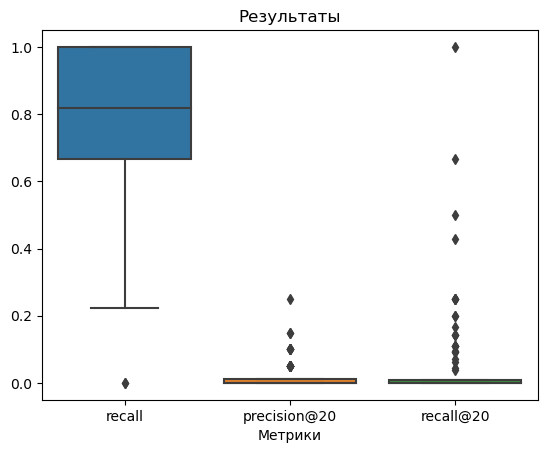

In [ ]:
sns.boxplot(data=pd.DataFrame(res_nn))
plt.xlabel('–ú–µ—Ç—Ä–∏–∫–∏')
plt.ylabel('')
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã')
plt.show()

In [ ]:
parameters  = {}
precisions_ = []
recalls_ = []
recalls_at_20_ = []

In [ ]:
for iter_ in [1000]:
    for depth in [10]:
        for lr in [0.001]:
            for user_id in notebook.tqdm(users):
                train_rank, retrivial_result = RecoveryRec(train_f, test, user_id, top_items, n, 5, num_emb, nn)

                bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())

                target = train_rank['purchaise']
                features = train_rank.drop(['item_id', 'user_id', 'purchaise'], axis=1)

                group_id_train = [0]*target.shape[0]

                # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
                train_data = cb.Pool(data=features, label=target, group_id=group_id_train)
                test_data = cb.Pool(data=retrivial_result)

                parameters['iterations'] = iter_
                parameters['depth'] = depth
                parameters['learning_rate'] = lr

                params = {'iterations': iter_,
                          'custom_metric': ['NDCG'],
                          'verbose': True,
                          'random_seed': RANDOM_STATE,
                          'loss_function' : 'YetiRank',
                          'depth' : depth,
                          'learning_rate' : lr
                }

                model = cb.CatBoost(params)
                model.fit(train_data, verbose=False)
                predictions = model.predict(test_data)

                retrivial_result['rank'] = predictions
                retrivial_result.sort_values(by='rank', inplace=True, ascending=False)

                relevant_recommendations = list(retrivial_result['item_id'].unique())

                precisions_.append(precision_at_k(relevant_recommendations[:20], bought_test))
                recalls_.append(recall_at_k(relevant_recommendations, bought_test))
                recalls_at_20_.append(recall_at_k(relevant_recommendations[:20], bought_test))
            print(parameters)
            print(f'precision@20: {np.mean(precisions_)}')
            print(f'recall@20: {np.mean(recalls_at_20_)}')
            print(f'recall: {np.mean(recalls_)}')
            print(features.shape[0])

In [ ]:
parameters  = {}
precisions_cb = []
recalls_cb = []
recalls_at_20_cb = []

In [ ]:
parameters = {}
for iter_ in [1000]:
    for depth in [7]:
        for lr in [0.001]:
            for user_id in notebook.tqdm(users):
                parameters['depth'] = depth
                parameters['iter_'] = iter_
                train_rank, retrivial_result = Recovery(train_f, test, user_id, top_items, n, k_recovery, num_emb)

                bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())

                target = train_rank['purchaise']
                features = train_rank.drop(['item_id', 'user_id', 'purchaise'], axis=1)

                group_id_train = [0]*target.shape[0]

                # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
                train_data = cb.Pool(data=features, label=target, group_id=group_id_train)
                test_data = cb.Pool(data=retrivial_result)


                params = {'iterations': iter_,
                          'custom_metric': ['NDCG'],
                          'verbose': True,
                          'random_seed': RANDOM_STATE,
                          'loss_function' : 'YetiRank',
                          'depth' : depth,
                          'learning_rate' : lr
                }

                model = cb.CatBoost(params)
                model.fit(train_data, verbose=False)
                predictions = model.predict(test_data)

                retrivial_result['rank'] = predictions
                retrivial_result.sort_values(by='rank', inplace=True, ascending=False)

                relevant_recommendations = list(retrivial_result['item_id'].unique())
                precisions_cb.append(precision_at_k(relevant_recommendations[:20], bought_test))
                recalls_cb.append(recall_at_k(relevant_recommendations, bought_test))
                recalls_at_20_cb.append(recall_at_k(relevant_recommendations[:20], bought_test))

            print(f'precision@20: {np.mean(precisions_cb)}')
            print(f'recall@20: {np.mean(recalls_at_20_cb)}')
            print(f'recall: {np.mean(recalls_cb)}')
            print(features.shape[0], parameters)

  0%|          | 0/100 [00:00<?, ?it/s]

precision@20: 0.015500000000000003
recall@20: 0.044491513116513115
recall: 0.79248254985755
8 {'depth': 7, 'iter_': 1000}


In [ ]:
res_cb = {'recall': recalls_cb, 'precision@20': precisions_cb, 'recall@20': recalls_at_20_cb}

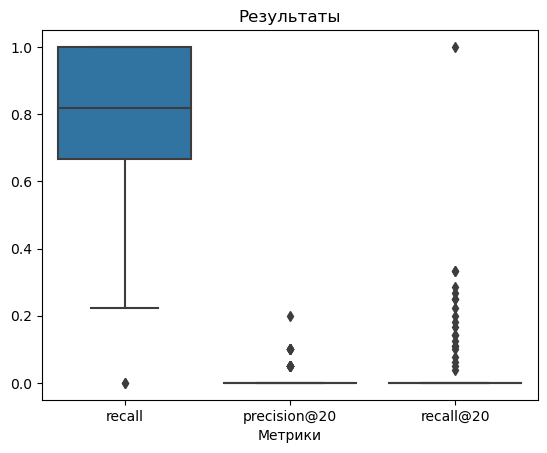

In [ ]:
sns.boxplot(data=pd.DataFrame(res_cb))
plt.xlabel('–ú–µ—Ç—Ä–∏–∫–∏')
plt.ylabel('')
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã')
plt.show()

In [ ]:
parameters = {}
for lambd in [0.001]:
    for lr in [0.001]:
        precisions = []
        for user_id in notebook.tqdm(users):
            parameters['lambda'] = lambd
            parameters['larning rate'] = lr
            train_rank, retrivial_result = Recovery(train_f, test, user_id, top_items, n, k_recovery, num_emb)

            bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())

            target = train_rank['purchaise']
            features = train_rank.drop(['item_id', 'user_id', 'purchaise'], axis=1)
            dump_svmlight_file(features, target, 'libsvm_train_rank.txt')
            param = {'task':'reg', 'lr': lr, 'lambda': lambd, 'metric':'acc'}

            ffm_model = xl.create_ffm()
            ffm_model.setTrain("libsvm_train_rank.txt")


            ffm_model.fit(param, "ffm_out.out")
            ffm_model.setSign()
            retrivial_result_test = retrivial_result.drop(['user_id', 'item_id'], axis=1)
            dump_svmlight_file(retrivial_result_test, np.zeros(retrivial_result_test.shape[0]), 'libsvm_test_rank.txt')
            ffm_model.setTest("libsvm_test_rank.txt")
            ffm_model.predict("ffm_out.out", 'output_rank.txt')
            rank = pd.read_csv('output_rank.txt')
            retrivial_result.reset_index(inplace=True, drop=True)
            retrivial_result['rank'] = rank
            retrivial_result.reset_index(inplace=True, drop=True)
            relevant_recommendations = retrivial_result.sort_values(by='rank', ascending=False)

            precisions.append(precision_at_k(relevant_recommendations[:20], bought_test))
        print(np.mean(precisions))
        print(parameters)

–î—Ä—É–≥–∞—è –º–æ–¥–µ–ª—å BM25 –¥–ª—è —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è:

In [ ]:
users = random.sample(users_tt, 100)
parameters  = {}
precisions_bm = []
recalls_bm = []
recalls_at_20_bm = []

In [ ]:
grouped_train = train_.drop(['order_ts'], axis=1).groupby('user_id')['item_id'].agg(lambda x: list(map(str, x)))
for user_id in notebook.tqdm(users):

    query = list(map(str, grouped_train.loc[user_id]))
    grouped_train_1 = grouped_train.drop(user_id, axis=0)

    query = list(set(query))

    corpus = np.array(grouped_train_1.values)
    bm25 = BM25Okapi(corpus)
    doc_scores = bm25.get_scores(query)

    sc = pd.DataFrame(data=doc_scores, index=grouped_train_1.index, columns=['scores'])
    sc_sort = sc.sort_values(by='scores', ascending=False)
    users_relevant = sc_sort[sc_sort['scores'] > 0].index

    merged_list = list(chain.from_iterable(grouped_train_1[users_relevant].values))
    rec = list(map(int, pd.Series(merged_list).unique()))
    bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())
    query_int = list(map(int, query))
    rec_new = [x for x in rec if x not in query_int]

    precisions_bm.append(precision_at_k(rec_new[:20], bought_test))
    recalls_bm.append(recall_at_k(rec_new, bought_test))
    recalls_at_20_bm.append(recall_at_k(rec_new[:20], bought_test))

print(f'precision@20: {np.mean(precisions_bm)}')
print(f'recall@20: {np.mean(recalls_at_20_bm)}')
print(f'recall: {np.mean(recalls_bm)}')

  0%|          | 0/100 [00:00<?, ?it/s]

precision@20: 0.018000000000000002
recall@20: 0.043092564154635096
recall: 0.813008910876817


In [ ]:
res_bm = {'recall': recalls_bm, 'precision@20': precisions_bm, 'recall@20': recalls_at_20_bm}

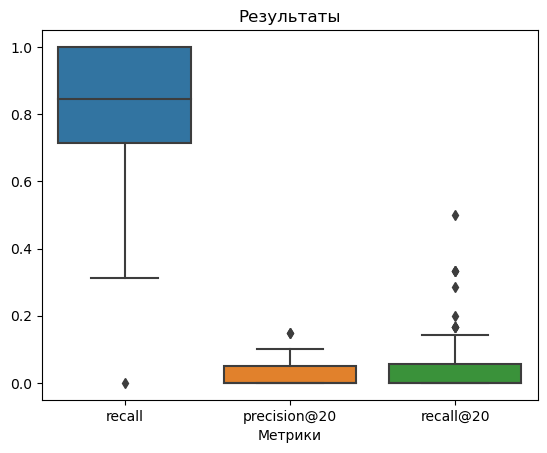

In [ ]:
sns.boxplot(data=pd.DataFrame(res_bm))
plt.xlabel('–ú–µ—Ç—Ä–∏–∫–∏')
plt.ylabel('')
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã')
plt.show()

–ò—Ç–æ–≥:
- –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Ç–æ–ª—å–∫–æ faiss –∏ catboost - —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ª—É—á—à–µ –¥—Ä—É–≥–∏—Ö
- –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –¥–≤–æ–π–Ω–æ–≥–æ –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è (–∏ –¥–∞–∂–µ –∏–Ω–æ–≥–¥–∞ —Ö—É–∂–µ)
- –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ NN –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ catboost –ø–æ—Å–ª–µ faiss –∏ –¥–æ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è - –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
- –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ BM25 –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ - —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ö—É–∂–µ
- –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ BM25 –¥–ª—è –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–∏ - —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Ö—É–∂–µ

–ü–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–∏—Ç—å BM25 –¥–ª—è —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è –Ω–∞—à–∏—Ö –ø—Ä–∏–∑–∑–Ω–∞–∫–æ–≤:

In [ ]:
for user_id in notebook.tqdm(users):

    train_rank, retrivial_result = Recovery(train_f, test, user_id, top_items, n, k_recovery, num_emb)
    grouped_train = retrivial_result.agg(lambda x: list(map(str, x)))

    query = list(map(str, train_f.iloc[user_id]))
    query = list(set(query))

    corpus = np.array(grouped_train.values)
    bm25 = BM25Okapi(corpus)
    doc_scores = bm25.get_scores(query)

    sc = pd.DataFrame(data=doc_scores, index=grouped_train.index, columns=['scores'])
    sc_sort = sc.sort_values(by='scores', ascending=False)
    users_relevant = sc_sort[sc_sort['scores'] > 0]

    recommendations = retrivial_result.join(users_relevant, how='right')['item_id']
    bought_test = list(test[test['user_id'] == user_id]['item_id'].unique())
    recommendations = list(recommendations.unique())

    precisions_mix.append(precision_at_k(recommendations[:20], bought_test))
    recalls_mix.append(recall_at_k(recommendations, bought_test))
    recalls_at_20_mix.append(recall_at_k(recommendations[:20], bought_test))

print(f'precision@20: {np.mean(precisions_mix)}')
print(f'recall@20: {np.mean(recalls_at_20_mix)}')
print(f'recall: {np.mean(recalls_mix)}')

  0%|          | 0/100 [00:00<?, ?it/s]

precision@20: 0.012980769230769231
recall@20: 0.02842460830232569
recall: 0.752162757023092


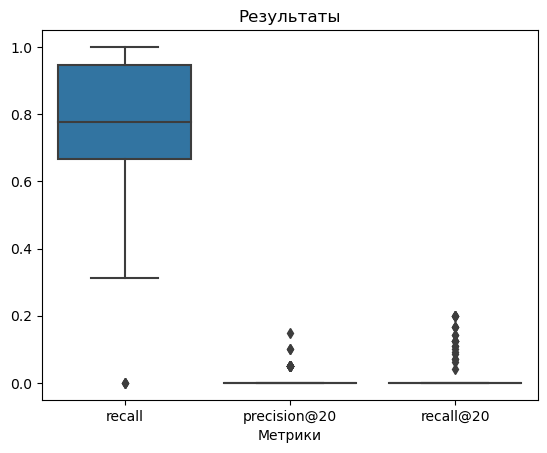

In [ ]:
res_mix = {'recall': recalls_mix, 'precision@20': precisions_mix, 'recall@20': recalls_at_20_mix}

sns.boxplot(data=pd.DataFrame(res_mix))
plt.xlabel('–ú–µ—Ç—Ä–∏–∫–∏')
plt.ylabel('')
plt.title('–†–µ–∑—É–ª—å—Ç–∞—Ç—ã')
plt.show()

In [ ]:
print(f'Coverage xlearn : {coverage_xl:.2f}')
print(f'Coverage catboost : {coverage_cb:.2f}')

Coverage xlearn : 30.49
Coverage catboost : 22.92


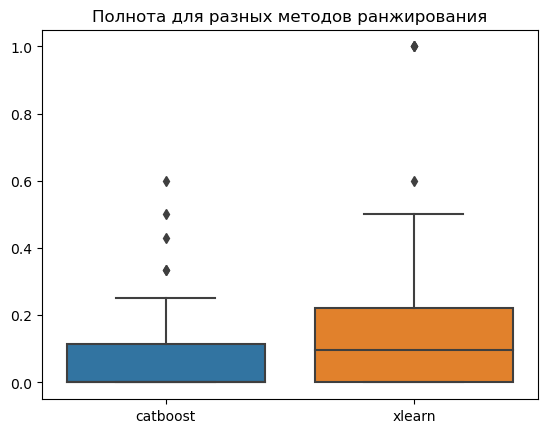

In [ ]:
sns.boxplot(data=pd.DataFrame(df_recalls))
plt.title('–ü–æ–ª–Ω–æ—Ç–∞ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è')
plt.show()

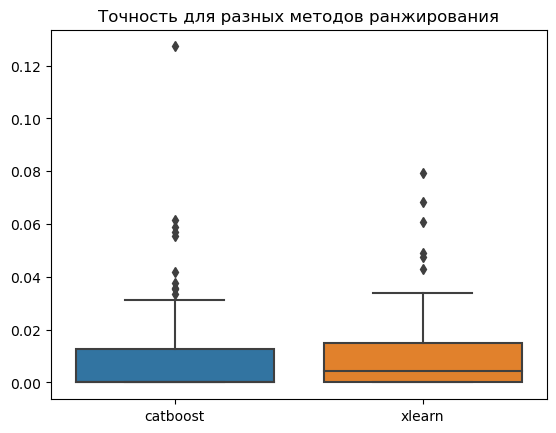

In [ ]:
sns.boxplot(data=pd.DataFrame(df_precisions))
plt.title('–¢–æ—á–Ω–æ—Å—Ç—å –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è')
plt.show()

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:
- –≤ —Å—Ä–µ–¥–Ω–µ–º —Å–µ–±—è –ª—É—á—à–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç **xlearn**
- –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω—ã–π —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≥–æ—Ä–∞–∑–¥–æ –ª—É—á—à–∏–µ —Ç–æ—á–Ω–æ—Å—Ç—å —É **catboost**

## –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è

In [ ]:
users = random.sample(users_tt, 50)

In [ ]:
k = 200

In [ ]:
# parameters = {}
# scores = {}
# max_precision = 0

# for n in [2_000_000, 4_000_000, 6_000_000]:
#     for th in [-5, 0, 5]:
#         vi = 10
#         vu = 5
#         nn = 25
#         k_recovery = 15
#         all_rec, recalls, precisions = RRN_Cb(train_, test, users, n, nn, th, 100)
#         parameters['batch_size'] = n
#         parameters['threshold'] = th

#         train_ = train_.reset_index(drop=True)

#         scores['recall_mean'] = np.mean(recalls)
#         scores['precision_mean'] = np.mean(precisions)
#         scores['recall_max'] = max(recalls)
#         scores['precision_max'] = max(precisions)

#         scores['coverage'] = len(set(all_rec))/len(set(data['item_id'].unique()))*100

#         print(f'–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {parameters}')
#         print(f'Result {scores}')
#         print('_'*30)

#         if scores['precision_mean'] > max_precision:
#             best_score = scores
#             best_params = parameters

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

–ü—Ä–∏ –ø–æ–¥–±–æ—Ä–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ø—Ä–∏ —É—á–µ—Ç–µ –≤—Å–µ—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –ø–æ–ª—É—á–∏–ª–∏—Å—å —Å—Ä–µ–¥–Ω–∏–µ **recall ~0.2, precision ~0.015**

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: nn = 25, k = 15, batch_size = 4000000, threshold –¥–ª—è catboost: -5

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã 'batch_size': 4000000, 'threshold': -5

### –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏ (–∑–¥–µ—Å—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ)

–î–ª—è –Ω–∞—à–µ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è:

<div style='color:red;'>–£—á–µ—Å—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫—É–ø–æ–∫ –≤ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ<div>

In [ ]:
n = 4_000_000 # —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
vi = 10 # –≤–µ–∫—Ç–æ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –∞–π—Ç–µ–º–æ–≤
vu = 5 # –≤–µ–∫—Ç–æ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —é–∑–µ—Ä–æ–≤
nn = 25 # —á–∏—Å–ª–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
k_recovery = 15 # —á–∏—Å–ª–æ –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤

users = random.sample(users_tt, 500)

all_rec_xl, recalls_xl, precisions_xl = RRN_Xlearn(train_, test, users, 200)

  0%|          | 0/500 [00:00<?, ?it/s]

NameError: name 'all_rec' is not defined

In [ ]:
coverage_xl = len(set(all_rec_xl))/len(set(data['item_id'].unique()))*100

In [ ]:
print(f'–ü–æ–∫—Ä—ã—Ç–∏–µ : {coverage_xl:.2f}')

–ü–æ–∫—Ä—ã—Ç–∏–µ : 50.69


In [ ]:
print(f'–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å : {np.mean(precisions_xl):.2f}')
print(f'–°—Ä–µ–¥–Ω—è—è –ø–æ–ª–Ω–æ—Ç–∞ : {np.mean(recalls_xl):.2f}')

–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å : 0.01
–°—Ä–µ–¥–Ω—è—è –ø–æ–ª–Ω–æ—Ç–∞ : 0.14


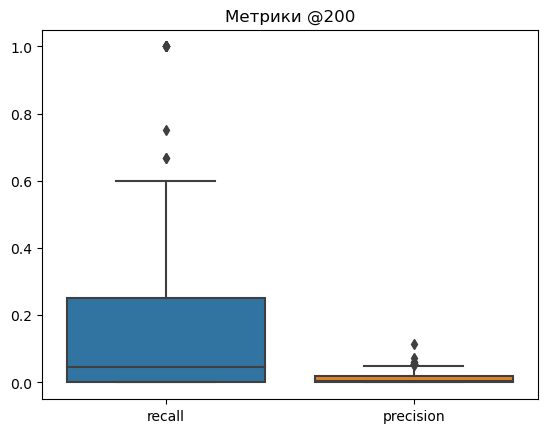

In [ ]:
sns.boxplot(data=pd.DataFrame({'recall': recalls_xl, 'precision': precisions_xl}))
plt.title('–ú–µ—Ç—Ä–∏–∫–∏ @200')
plt.show()

In [ ]:
th = -5 # —à–∞–≥ –¥–ª—è catboost
n = 4_000_000 # —Ä–∞–∑–º–µ—Ä –±–∞—Ç—á–∞
vi = 10 # –≤–µ–∫—Ç–æ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –∞–π—Ç–µ–º–æ–≤
vu = 5 # –≤–µ–∫—Ç–æ—Ä —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ —é–∑–µ—Ä–æ–≤
nn = 25 # —á–∏—Å–ª–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
k_recovery = 15 # —á–∏—Å–ª–æ –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤
users = random.sample(users_tt, 500)
all_rec_cb, recalls_cb, precisions_cb = RRN_Cb(train_, test, users, n, nn, th, 200)

coverage = len(set(all_rec_cb))/len(set(data['item_id'].unique()))*100

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
coverage_cb = len(set(all_rec_cb))/len(set(data['item_id'].unique()))*100

In [ ]:
print(f'–ü–æ–∫—Ä—ã—Ç–∏–µ : {coverage_cb:.2f}')

–ü–æ–∫—Ä—ã—Ç–∏–µ : 44.71


In [ ]:
print(f'–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å : {np.mean(precisions_cb):.2f}')
print(f'–°—Ä–µ–¥–Ω—è—è –ø–æ–ª–Ω–æ—Ç–∞ : {np.mean(recalls_cb):.2f}')

–°—Ä–µ–¥–Ω—è—è —Ç–æ—á–Ω–æ—Å—Ç—å : 0.01
–°—Ä–µ–¥–Ω—è—è –ø–æ–ª–Ω–æ—Ç–∞ : 0.11


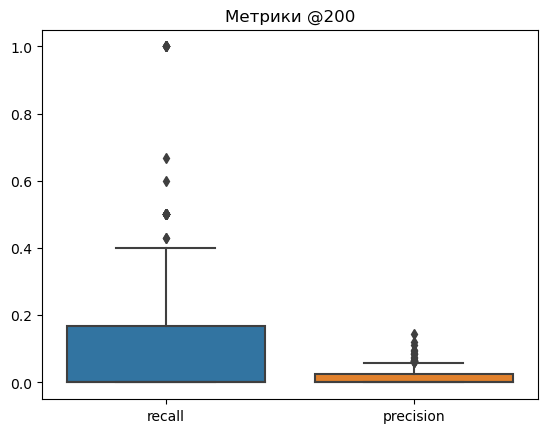

In [ ]:
sns.boxplot(data=pd.DataFrame({'recall': recalls_cb, 'precision': precisions_cb}))
plt.title('–ú–µ—Ç—Ä–∏–∫–∏ @200')
plt.show()

### –°—Ç—Ä—É–∫—Ç—É—Ä–∞ –ø–∞–π–ø–ª–∞–π–Ω–∞

**1. –û—Ç—á–∏—Å–∫–∞ –¥–∞–Ω–Ω—ã—Ö –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ –∫—Ä–∏—Ç–µ—Ä–∏–µ–º –ì—Ä–∞–±–±—Å–∞** <br>
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: `p1..p5` - –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ <br>

**2. –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–ª—è —é–∑–µ—Ä–æ–≤ –∏ –∞–π—Ç–µ–º–æ–≤** <br>
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: `mc_users`, `mc_items` - –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —é–∑–µ—Ä–æ–≤ –∏ –∞–π—Ç–µ–º–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è –≤–∫–ª—é—á–µ–Ω–∏—è –∏—Ö –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏; <br>
`vector_users`, `vector_items` - –≤–µ–ª–∏—á–∏–Ω–∞ –≤–µ–∫—Ç–æ—Ä–æ–≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ <br>

**3. –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤** <br>
–§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –¥–∞—Ç—ã –ø–æ–∫—É–ø–∫–∏, –∞ –∏–º–µ–Ω–Ω–æ –≤—Ä–µ–º—è –∏ –º–µ—Å—è—Ü –≤ —Ç—Ä–∏–æ–Ω–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–æ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ –¥–ª—è —É—á–µ—Ç–∞ –≤–æ–∑–º–æ–∂–Ω–æ–π —Ü–∏–∫–ª–∏—á–Ω–æ—Å—Ç–∏ - `FeaturesAdd()` <br>

**4. –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ** <br>
–ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ö–µ—à–∏—Ä–æ–≤–∞–Ω–∏–µ–º (–¥–ª—è –±—ã—Å—Ç—Ä–æ–π —Ä–∞–±–æ—Ç—ã) –±–∞—Ç—á–∞–º–∏ –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–∞–µ—Ç–∞. –ü—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, –ø–æ—Ö–æ–∂–∏—Ö –Ω–∞ —ç–º–±–µ–¥–¥–∏–Ω–≥ –Ω—É–∂–Ω–æ–≥–æ —é–∑–µ—Ä–∞. –û—Å—É—â–µ—Å—Ç–≤–ª—è–µ–º —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `faiss` - `Recovery()` <br>
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã: `n` - –≤–µ–ª–∏—á–∏–Ω–∞ –±–∞—Ç—á–∞, `k` - —á–∏—Å–ª–æ –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ <br>
–ï—Å–ª–∏ m - —á–∏—Å–ª–æ —Ç–æ–≤–∞—Ä–æ–≤, –∫—É–ø–ª–µ–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º, —Ç–æ –≤—Å–µ–≥–æ –∏–∑–≤–ª–µ—á–µ–Ω–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –±—É–¥–µ—Ç $ i*m*k $, –≥–¥–µ i - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç—Ç–µ—Ä–∞—Ü–∏–π (—Å–∫–æ–ª—å–∫–æ –±–∞—Ç—á–µ–π –ø–æ–º–µ—â–∞–µ—Ç—Å—è –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ) <br>

**5. –†–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ** <br>
–£—á–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–∞—Ç –∏ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–ª—è –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è <br>
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–∏—Å—Ç–∞–Ω—Ü–∏–π –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π, –∞ –∑–∞—Ç–µ–º —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏–µ —Å —Ç–∞—Ä–≥–µ—Ç–æ–º - —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º.
–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞–∑–Ω—ã–µ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –º–æ–¥–µ–ª–∏.

**6. –ü–æ–∏—Å–∫ –Ω–∞–∏–±–æ–ª–µ–µ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π** <br>
–ù–∞ –æ—Å–Ω–æ–≤–µ –º–µ—Ç–æ–¥–∞ –ø–æ–∏—Å–∫–∞ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –∏—â–µ–º –Ω–∞–∏–±–æ–ª–µ–µ —Ä–µ–ª–µ–≤–∞–Ω—Å—Ç–Ω—ã–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ <br>

**7. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏** <br>
–û—Ü–µ–Ω–∫–∞ –Ω–∞ 1000 –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

üí°–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ò—Å—Ç–æ—á–Ω–∏–∫–∏:
1. <a href='https://habr.com/ru/companies/otus/articles/732842/'> –ú–µ—Ç—Ä–∏–∫–∏ </a>